In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-2-e9a6b8f31d09>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# TITANIC - DATA VISUALIZATION


Dataset Titanic merupakan salah satu set data paling terkenal dan banyak dipelajari dalam dunia data science dan machine learning. Popularitasnya berasal dari cerita tragis tenggelamnya RMS Titanic pada perjalanan perdana tahun 1912, yang menyebabkan lebih dari 1.500 penumpang dan awak kapal meninggal. Dataset ini memberikan informasi detil tentang status kelangsungan hidup penumpang Titanic, termasuk usia, jenis kelamin, kelas tiket, tarif yang dibayar, dan banyak lagi.

source: https://www.kaggle.com/competitions/titanic/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/GreatEdu/Data Science Project 2/titanic_train.csv")
print(df.shape)

(891, 12)


In [5]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


### **Penjelasan dataset**
Setiap penumpang dalam dataset Titanic diidentifikasi dengan
 - PassengerId  
 - Survived: status kelangsungan hidupnya (1 untuk selamat, 0 untuk tidak selamat).

Informasi tambahan meliputi:
- Pclass (kelas sosial ekonomi penumpang),
- Name (nama penumpang),
- Sex (jenis kelamin),
- Age (umur),
- SibSp (jumlah saudara atau pasangan),
- Parch (jumlah orang tua atau anak),
- Ticket (nomor tiket),
- Fare (tarif perjalanan),
- Cabin (nomor kabin), dan
- Embarked (pelabuhan keberangkatan).

Tipe data:
- Numeric - Continuous : Fare, Age
- Numeric - Discrete : SibSp, Parch
- Category Ordinal : pclass (1st = Upper, 2nd = Middle, 3rd = Lower)
- Category Nominal : sex, embarked

In [6]:
#analisa deskriptif untuk tipe data numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualisasi Setiap Kolom / Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='count', ylabel='Survived'>

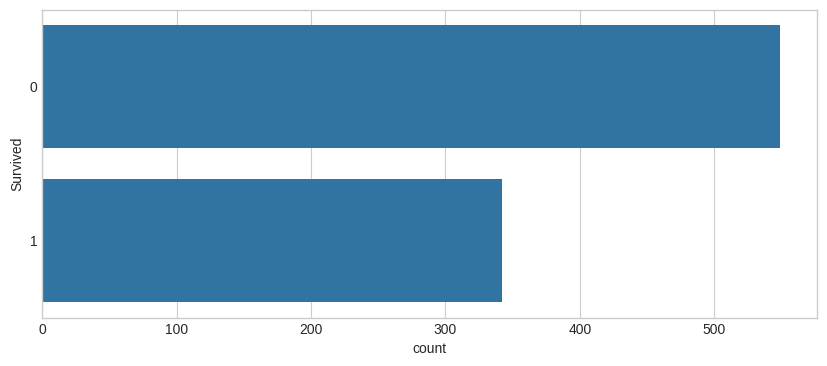

In [7]:
# perbandingan jumlah penumpang yang selamat
fig = plt.figure(figsize=(10,4))
print(df['Survived'].value_counts())
# df['Survived'].value_counts().plot.bar()
sns.countplot(y='Survived', data=df)

kesimpulan : lebih banyak penumpang yang tidak selamat

male      577
female    314
Name: Sex, dtype: int64


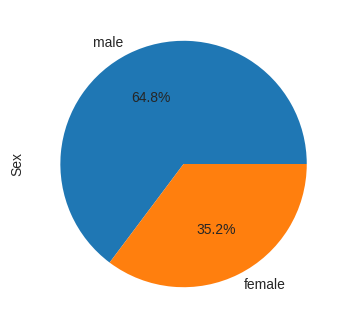

In [8]:
# perbandingan jenis kelamin penumpang
fig = plt.figure(figsize=(10,4))
# sns.countplot(y='Sex', data=df)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Sex'].value_counts())

kesimpulan : jumlah penumpang laki-laki jauh lebih banyak dibandingkan perempuan

S    644
C    168
Q     77
Name: Embarked, dtype: int64


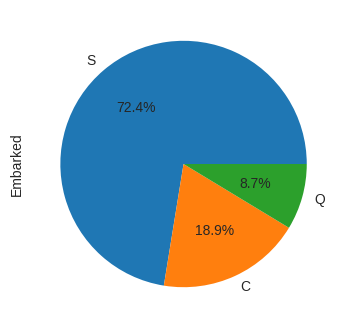

In [9]:
# perbandingan tempat keberangkatan
fig = plt.figure(figsize=(10,4))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Embarked'].value_counts())

kesimpulan = mayoritas penumpang (72.4%) berangkat dari kota S

3    491
1    216
2    184
Name: Pclass, dtype: int64


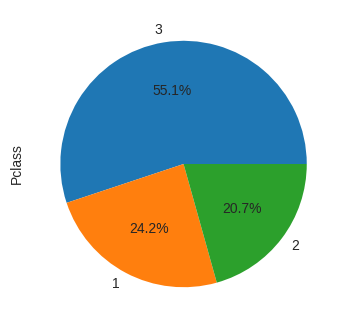

In [10]:
# Task 1 - Gambarkan Distribusi pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan

fig = plt.figure(figsize=(10,4))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Pclass'].value_counts())

Kesimpulan = mayoritas penumpang kapal berasal dari kelas sosial ekonomi kelas 3, dengan persentase sekitar 55.1%.

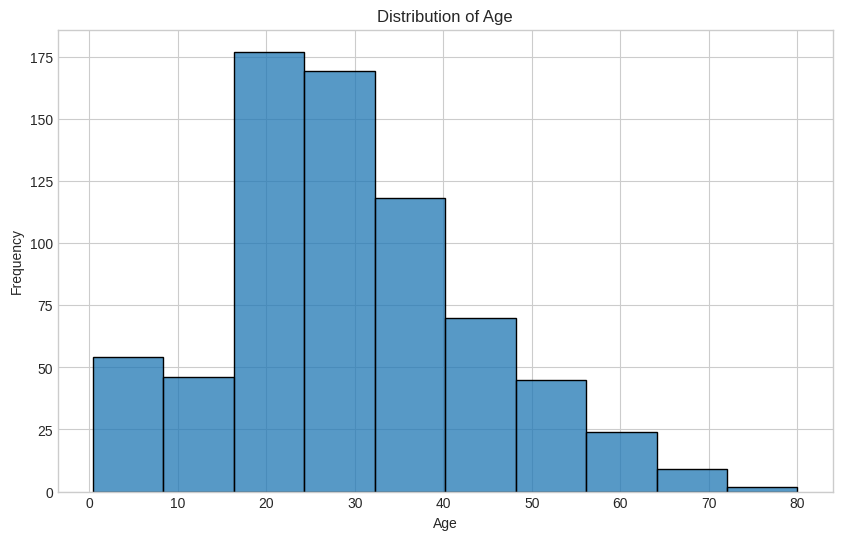

In [11]:
# Task 2 - Gambarkan Distribusi umur seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Kesimpulan = mayoritas penumpang yang menaiki kapal tersebut berusia sekitar 18 hingga 30 tahun.

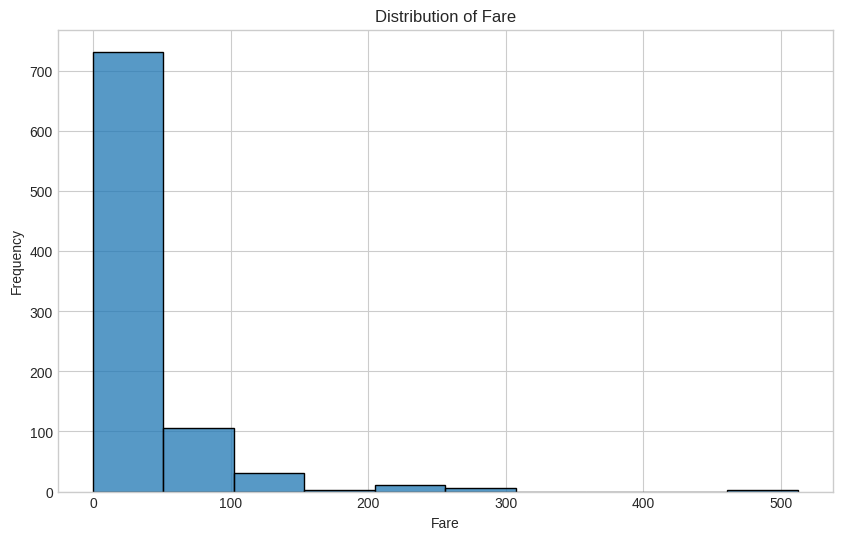

In [12]:
# Task 3 - Gambarkan Distribusi fare seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=10, kde=False)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

Kesimpulan = mayoritas tarif penumpang perjalanan berada di bawah 50 dollar, namun ada tarif yang jauh lebih tinggi, mencapai 500 dollar, yang kemungkinan bisa menjadi outlier.

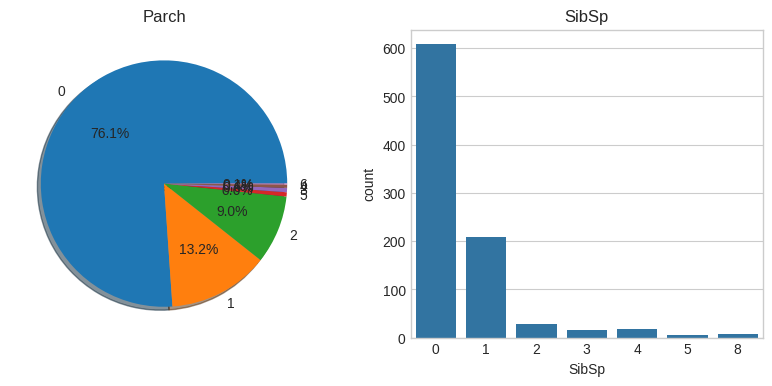

In [13]:
#persebaran Parch & SibSp
f,ax=plt.subplots(1,2,figsize=(10,4))
df['Parch'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')
sns.countplot(x='SibSp',data=df,ax=ax[1])
ax[1].set_title('SibSp')
plt.show()

kesimpulan : mayoritas penumpang adalah solo traveler

## Bivariate Analysis for Survived

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-15-66882620f989>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cor.corr()


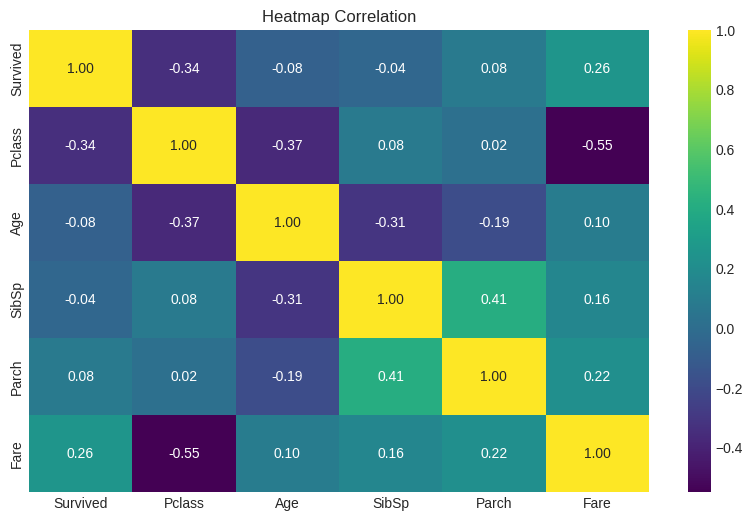

In [15]:
# Task 4 : tampilkan heatmap correlation untuk kolom 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
# dan tuliskan kesimpulan yang menarik dari heatmap tersebut
df_cor = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Menghitung korelasi antara kolom-kolom tersebut
corr_matrix = df_cor.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Correlation')
plt.show()

Kesimpulan = terdapat korelasi positif (0.28) antara kemungkinan selamat dengan tarif perjalanan, yang menunjukkan bahwa ada kecenderungan di mana penumpang dengan tarif perjalanan yang lebih tinggi memiliki kemungkinan lebih besar untuk selamat. Di sisi lain, terdapat korelasi negatif (-0.34) antara kemungkinan selamat dengan tingkat kelas ekonomi, menunjukkan bahwa penumpang dengan kelas ekonomi yang lebih rendah memiliki kemungkinan lebih besar untuk selamat.

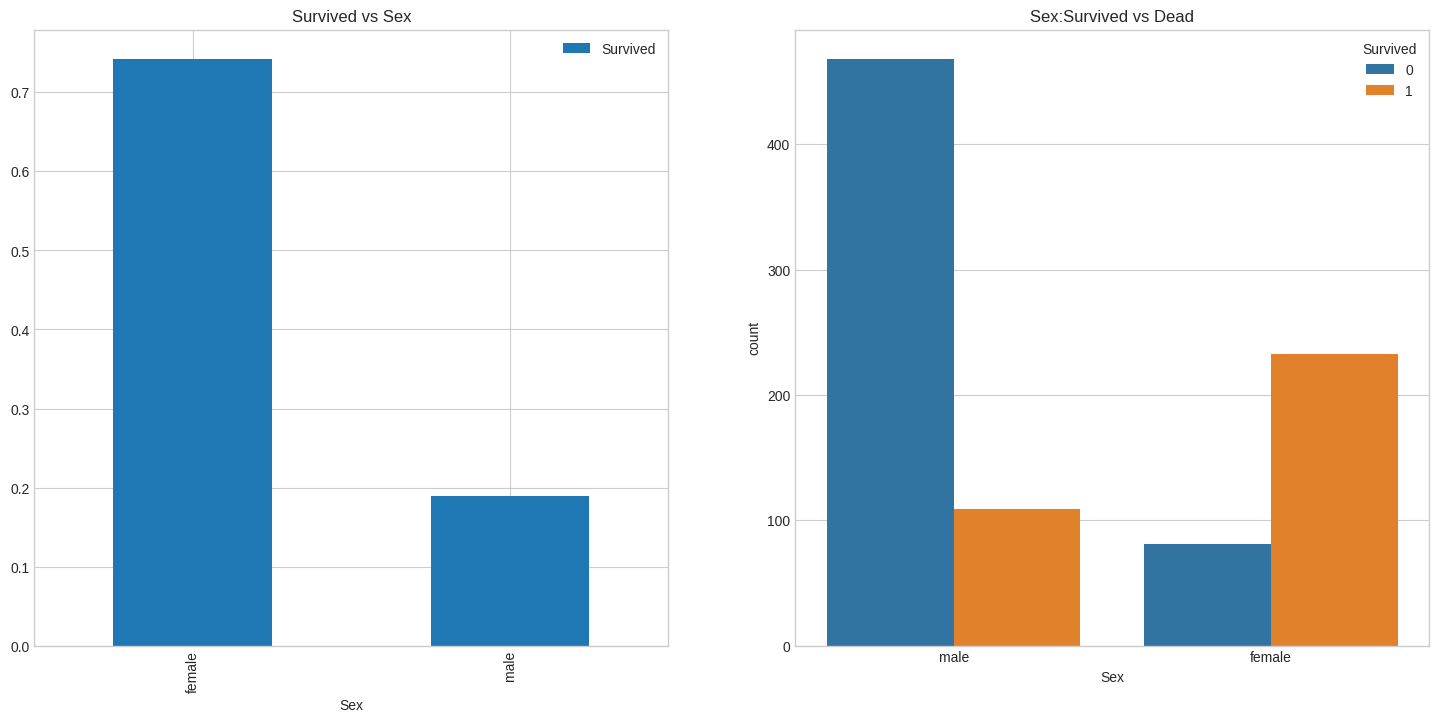

In [16]:
# Perbandingan Sex dengan Survived
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Kesimpulan : pada plot di atas memiliki distribusi yang berbeda antara male dan female, dimana mayoritas male tidak selamat sedangkan mayoritas female selamat

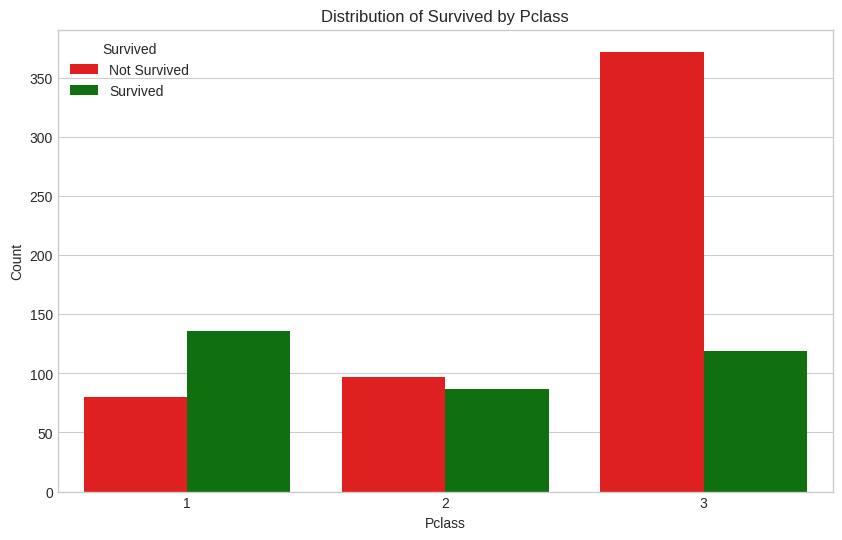

In [17]:
# Task 5 - Gambarkan Distribusi perbandingan antara Pclass dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Visualisasi distribusi perbandingan antara Pclass dan Survived
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Survived by Pclass')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Kesimpulan = mayoritas penumpang yang tidak selamat berasal dari kelas ekonomi 3 (>350 orang), sementara mayoritas penumpang yang selamat berasal dari kelas ekonomi 1 (<150 orang).

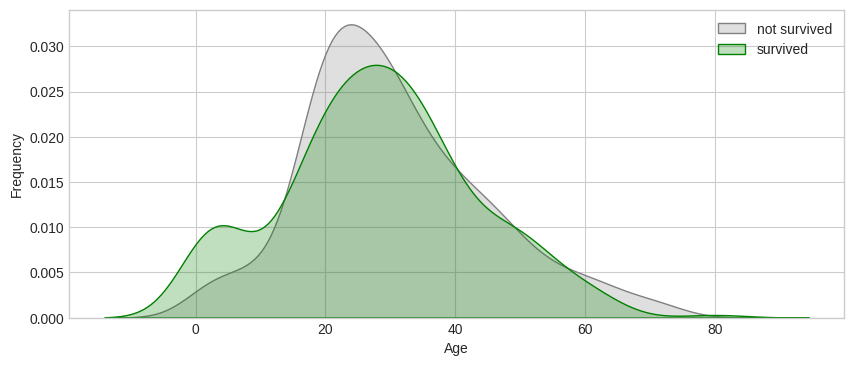

In [18]:
# Perbandingan Age dengan Survived dengan Kernel Density Plot
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='green',fill=True, label='survived')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()

Tidak ada yang perbedaan yang terlihat plot ini, kecuali bagian paling kiri distribusinya. Ini mungkin mengisyaratkan kemungkinan bahwa anak-anak dan bayi menjadi prioritas.

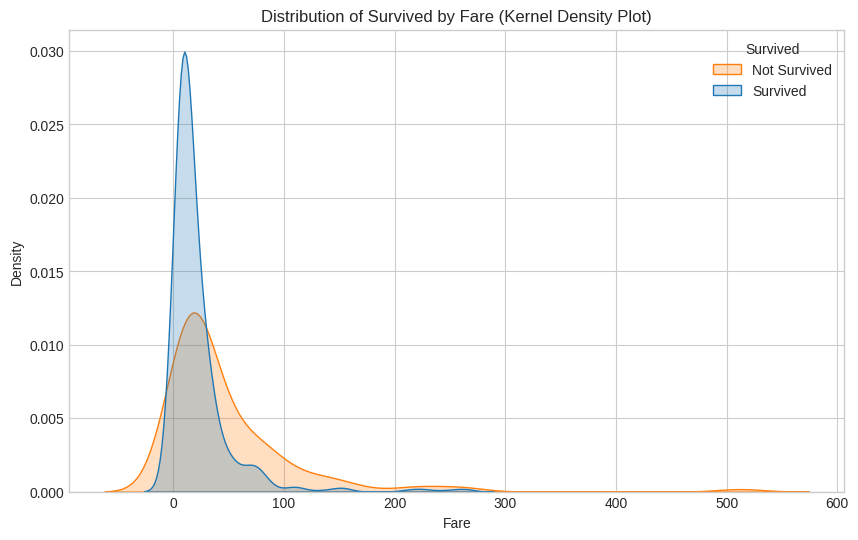

In [19]:
# Task 6 - Gambarkan Distribusi perbandingan antara Fare dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Visualisasi distribusi perbandingan antara Fare dan Survived
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, common_norm=False)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Distribution of Survived by Fare (Kernel Density Plot)')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Kesimpulan = distribusi tarif perjalanan penumpang yang lebih rendah memiliki kecenderungan lebih tinggi untuk selamat dibandingkan dengan tarif perjalanan yang lebih tinggi.

## Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

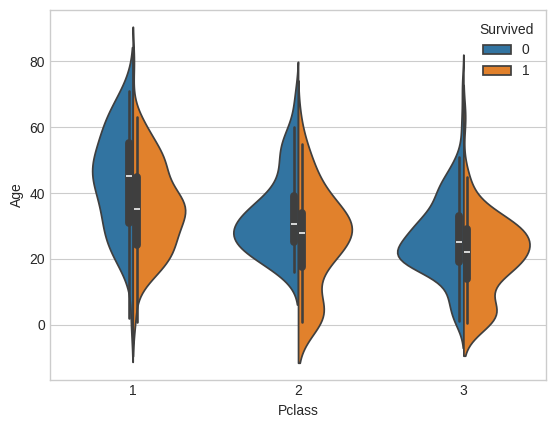

In [20]:
# Analisis Pclass, Age dan Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

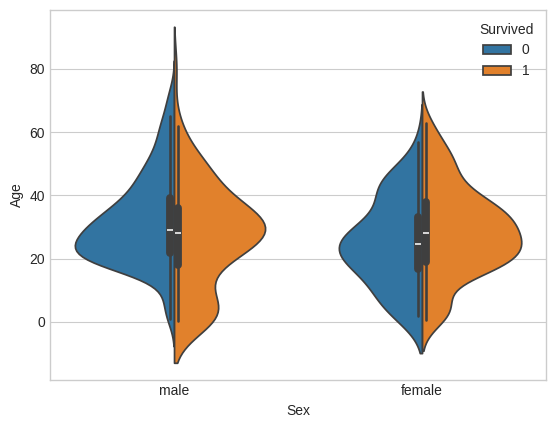

In [21]:
# Analisis Sex, Age dan Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

In [22]:
# Task 7-10 Buatlah tambahan 4 plot analisa, Anda dibebaskan untuk membuat data visualisasi
# dengan kombinasi data yang berbeda untuk menemukan informasi menarik mengenai dataset Titanic ini
# dan berikan kesimpulan Anda terhadap analisa yang anda buat

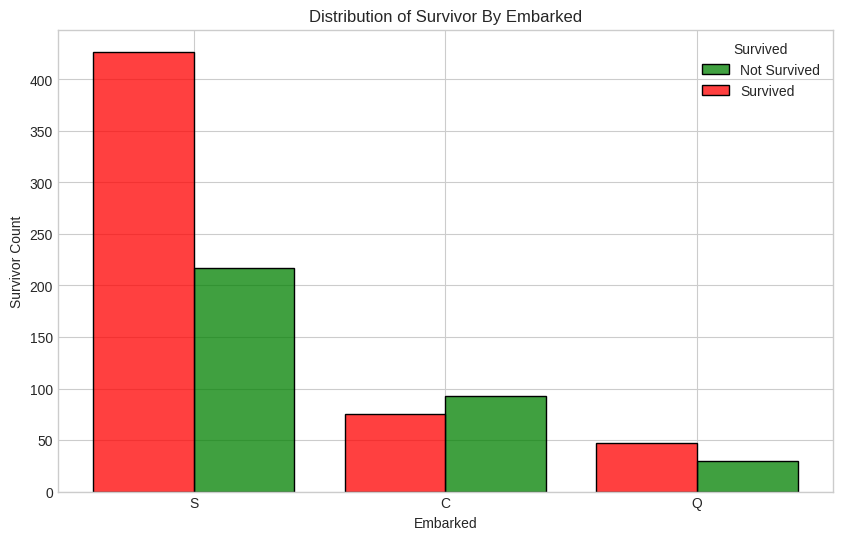

In [57]:
# Visualisasi distribusi perbandingan antara Embarked dan Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Embarked', hue='Survived', multiple='dodge', shrink=.8, palette=['red', 'green'])
plt.title('Distribution of Survivor By Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survivor Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Kesimpulan = Mayoritas penumpang yang selamat maupun tidak selamat berangkat dari pelabuhan S (Southampthon)

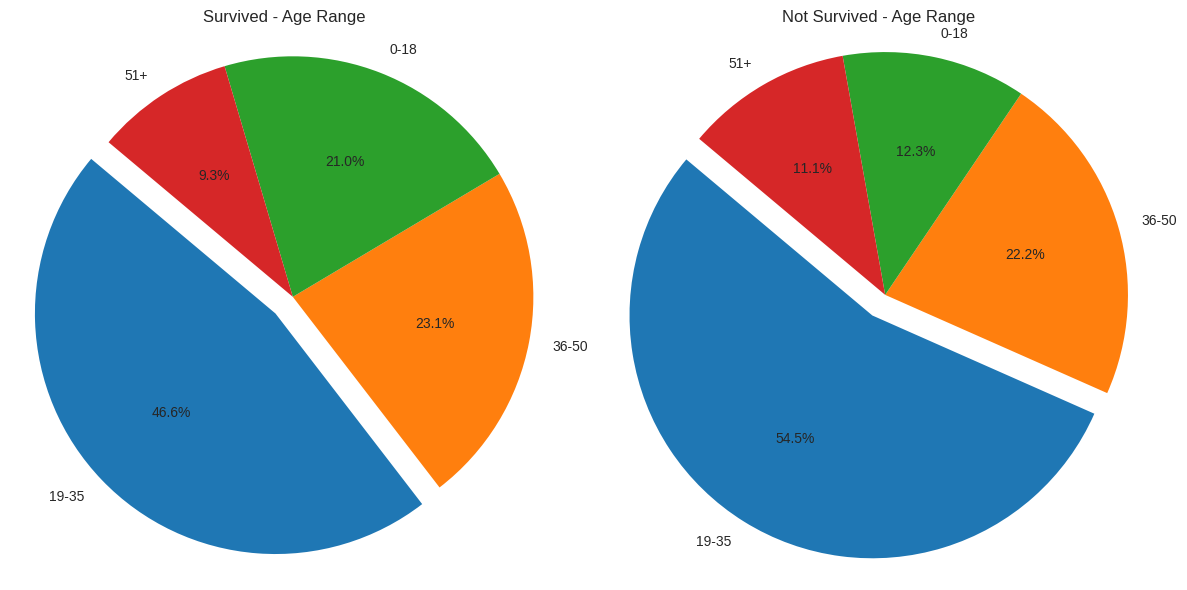

In [70]:
# Tentukan batas-batas rentang usia
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']

# Buat kolom baru 'AgeRange' yang menunjukkan rentang usia
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter data untuk penumpang yang selamat dan tidak selamat
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

# Hitung jumlah penumpang untuk setiap rentang usia
survived_age_counts = survived_df['AgeRange'].value_counts()
not_survived_age_counts = not_survived_df['AgeRange'].value_counts()

# Buat dua diagram pie terpisah dengan efek visual yang lebih menarik
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Diagram pie untuk penumpang yang selamat
explode = (0.1, 0, 0, 0)  # Efek exploded pada slice pertama
axes[0].pie(survived_age_counts, labels=survived_age_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
axes[0].set_title('Survived - Age Range')
axes[0].axis('equal')  # Agar diagram pie menjadi lingkaran

# Diagram pie untuk penumpang yang tidak selamat
explode = (0.1, 0, 0, 0)  # Efek exploded pada slice pertama
axes[1].pie(not_survived_age_counts, labels=not_survived_age_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
axes[1].set_title('Not Survived - Age Range')
axes[1].axis('equal')  # Agar diagram pie menjadi lingkaran

plt.tight_layout()  # Untuk mengatur tata letak plot agar rapi
plt.show()

Kesimpulan = mayoritas penumpang yang selamat memiliki rentang usia antara 19 hingga 35 tahun, sementara setengah dari penumpang yang tidak selamat juga berada dalam rentang usia yang sama, yaitu 19 hingga 35 tahun.

In [49]:
# Buat kolom baru 'passenger_type' dengan atribut 'child' berdasarkan nilai 'Age'
df['passenger_type'] = df.apply(lambda row: 'child' if row['Age'] < 18 else row['Sex'], axis=1)

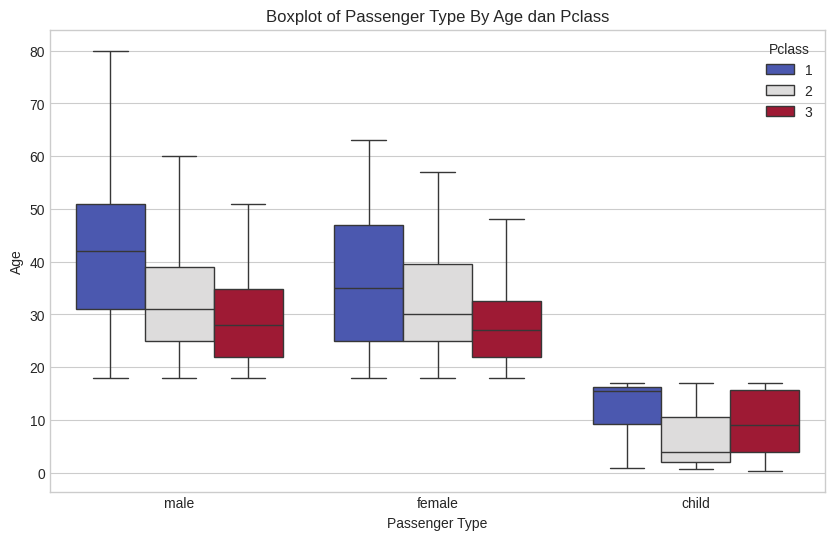

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="passenger_type", y="Age", hue="Pclass", palette="coolwarm", showfliers=False)
plt.title('Boxplot of Passenger Type By Age dan Pclass')
plt.xlabel('Passenger Type')
plt.ylabel('Age')
plt.legend(title='Pclass')
plt.show()

Kesimpulan = Penumpang dewasa laki-laki memiliki rentang usia paling luas yang cenderung lebih tua di kelas ekonomi 1 menunjukkan adanya keberagaman usia yang signifikan di antara mereka, dengan mayoritas penumpang cenderung berusia lebih tua.

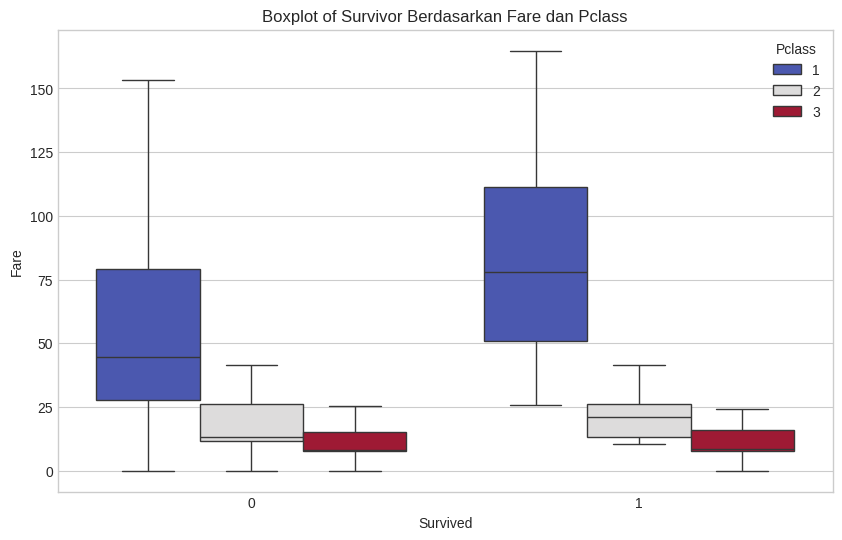

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Survived", y="Fare", hue="Pclass", palette="coolwarm", showfliers=False)
plt.title('Boxplot of Survivor By Fare and Pclass')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.legend(title='Pclass')
plt.show()

Kesimpulan = penumpang dengan kelas ekonomi 1 dan tarif pembayaran di atas $25 memiliki prioritas untuk mengevakuasi diri terlebih dahulu, diikuti oleh penumpang dengan kelas ekonomi 2.

<ipython-input-67-2419b45491db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="passenger_type", y="Survived", palette="coolwarm")


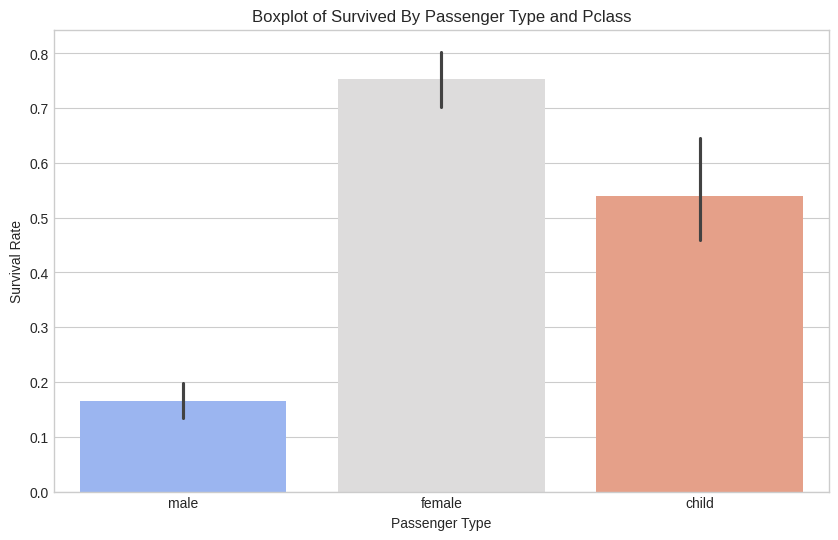

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="passenger_type", y="Survived", palette="coolwarm")
plt.title('Boxplot of Survived By Passenger Type and Pclass')
plt.xlabel('Passenger Type')
plt.ylabel('Survival Rate')
plt.show()

Kesimpulan = Perempuan dan anak-anak memiliki kesempatan untuk selamat lebih dari 50%

<ipython-input-68-4b5f9684ed74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Parch", y="Survived", palette="coolwarm")


<Axes: xlabel='Parch', ylabel='Survived'>

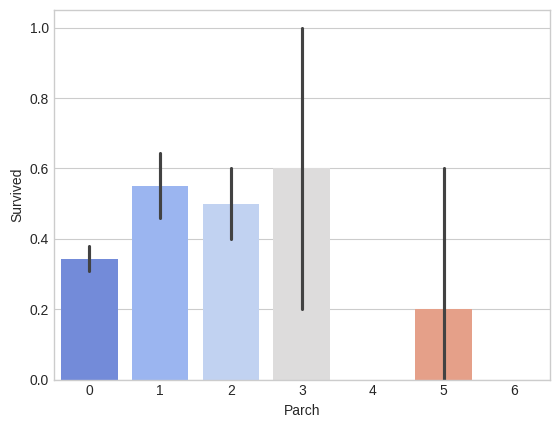

In [68]:
sns.barplot(data=df, x="Parch", y="Survived", palette="coolwarm")

Kesimpulan = Penumpang yang berpergian bersama 3 orang memiliki kesempatan selamat paling tinggi (60%)